In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [39]:
df_train = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv")
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [41]:
df = df_train

df['datetime'] = pd.to_datetime(df['datetime'])
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
# df.set_index('datetime', inplace=True)

df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


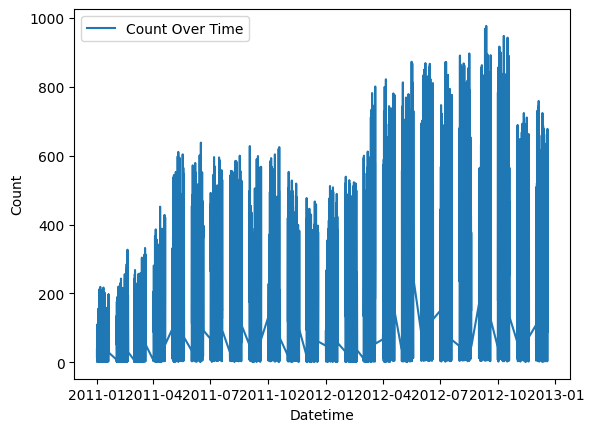

In [42]:
import matplotlib.pyplot as plt


plt.plot(df['datetime'], df['count'], label='Count Over Time') 
plt.xlabel('Datetime')
plt.ylabel('Count')
plt.legend()
plt.show()

### Histogram of all features

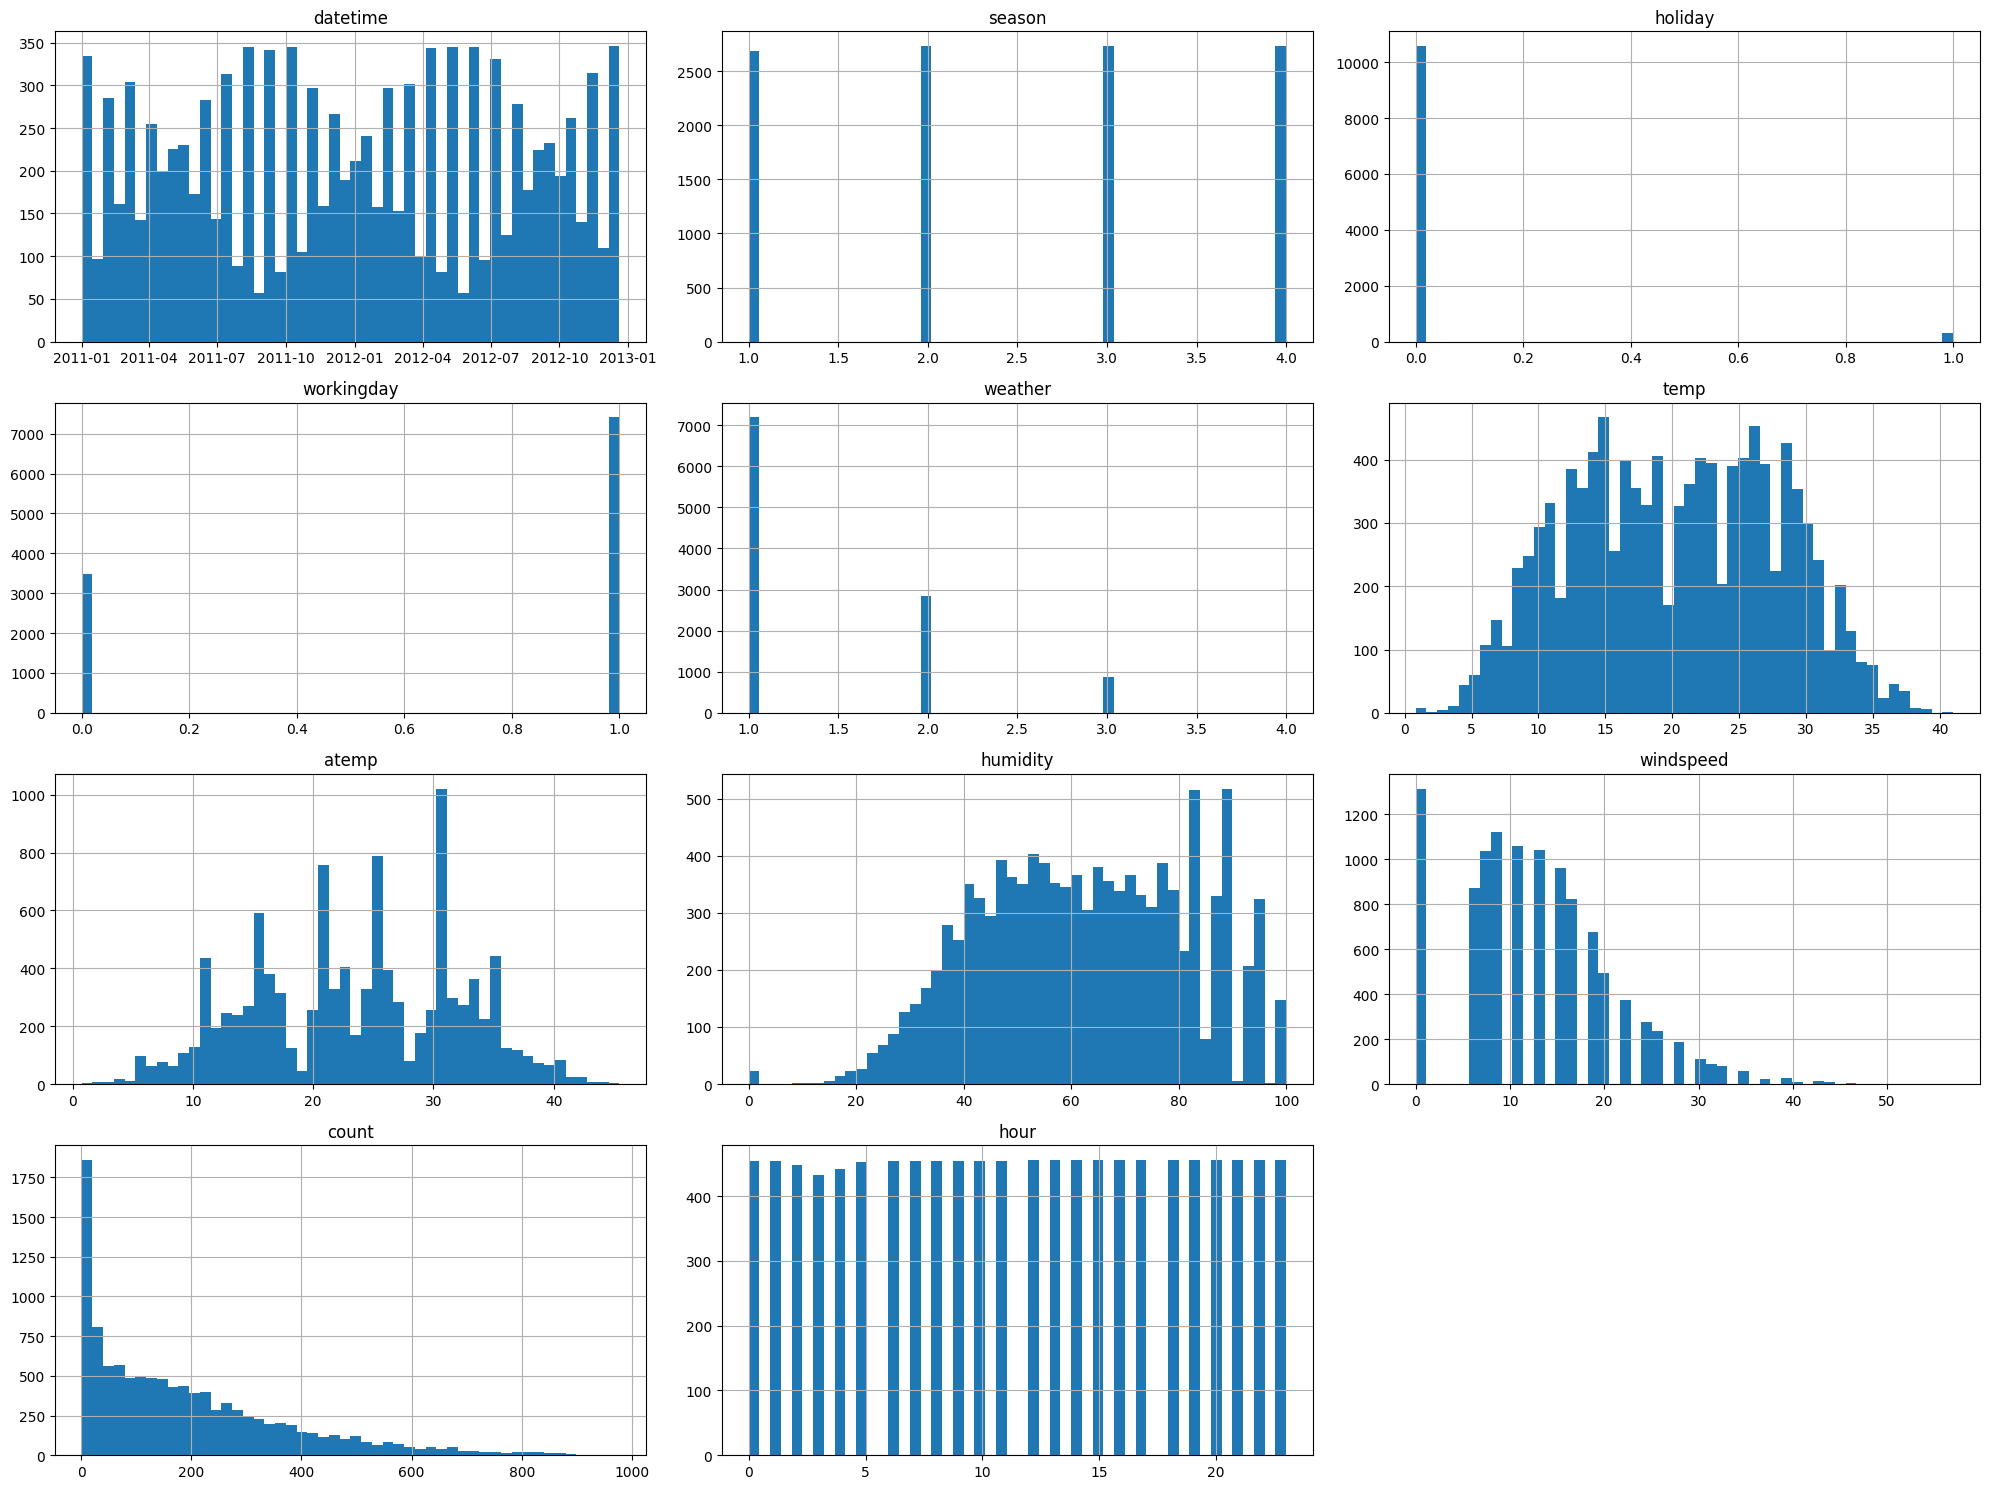

In [86]:
df_train.hist(bins=50, figsize=(20, 15))

plt.tight_layout()

plt.show()

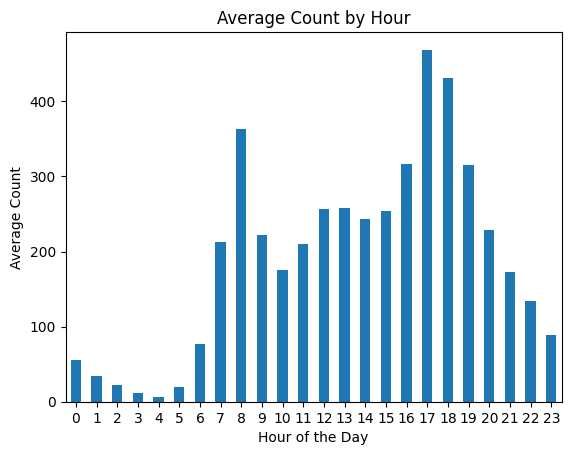

In [43]:
df['hour'] = df['datetime'].dt.hour

hourly_average = df.groupby('hour')['count'].mean()


hourly_average.plot(kind='bar')
plt.title('Average Count by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.xticks(rotation=0) 
plt.show()

### PCA Analysis to see which features are important

In [88]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [89]:
features = df_train.drop(['count', 'datetime'], axis=1)
print(features)

       season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  hour  
0         0.0000     0  
1         0.0000     1  
2         0.0000     2  
3         0.0000     3  
4         

In [90]:
pca = PCA(n_components=features.shape[1]) 

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [91]:
pca.fit(features_scaled)

features_pca = pca.transform(features_scaled)

print("Variance explained by each component:", pca.explained_variance_ratio_)

Variance explained by each component: [0.23948112 0.18812461 0.13970041 0.11816014 0.0941379  0.08790936
 0.0825376  0.04837526 0.0015736 ]


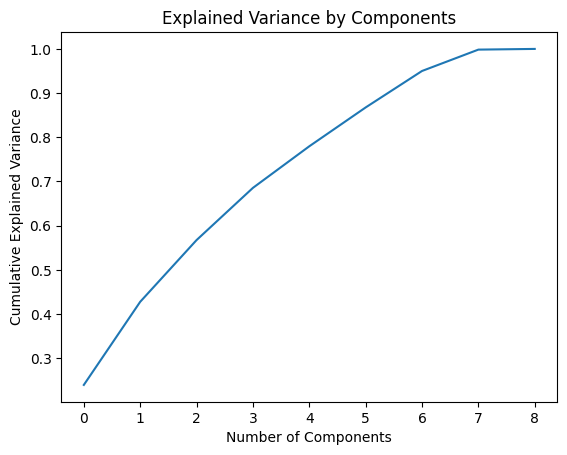

In [92]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

Since all components lead towards 100% variance, we will take all features into account. 

In [44]:
pip install autogluon

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [45]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
from autogluon.tabular import TabularPredictor, TabularDataset

In [46]:
df_test = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv")
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [47]:
df_test['datetime'] = pd.to_datetime(df_test['datetime'])
df_test['hour'] = df_test['datetime'].dt.hour
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4


In [48]:
df_train = df_train.drop(['casual', 'registered'], axis=1)

In [49]:
predictor = TabularPredictor(label='count').fit(train_data=df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20240511_035814"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240511_035814"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Dec 19 13:14:11 UTC 2023
CPU Count:       

[1000]	valid_set's rmse: 38.8359
[2000]	valid_set's rmse: 36.5212
[3000]	valid_set's rmse: 35.9447
[4000]	valid_set's rmse: 35.7985
[5000]	valid_set's rmse: 35.7393
[6000]	valid_set's rmse: 35.7035


	-35.6399	 = Validation score   (-root_mean_squared_error)
	10.01s	 = Training   runtime
	0.34s	 = Validation runtime
Fitting model: LightGBM ...
	-35.3221	 = Validation score   (-root_mean_squared_error)
	1.28s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-38.6821	 = Validation score   (-root_mean_squared_error)
	7.21s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ...
	-34.3394	 = Validation score   (-root_mean_squared_error)
	57.45s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-39.8006	 = Validation score   (-root_mean_squared_error)
	3.27s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-45.0341	 = Validation score   (-root_mean_squared_error)
	9.75s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-35.5716	 = Validation score   (-root_mean_squared_error)
	1.87s	 = Training   runtime
	0.03s	 = Validation run

[1000]	valid_set's rmse: 33.9122


	-33.8083	 = Validation score   (-root_mean_squared_error)
	3.68s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMLarge': 0.375, 'CatBoost': 0.208, 'NeuralNetTorch': 0.167, 'LightGBMXT': 0.125, 'XGBoost': 0.083, 'RandomForestMSE': 0.042}
	-32.296	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 142.21s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240511_035814")


In [50]:
predictor = TabularPredictor.load("AutogluonModels/ag-20240511_034732")

In [51]:
leaderboard = predictor.leaderboard(silent=True)

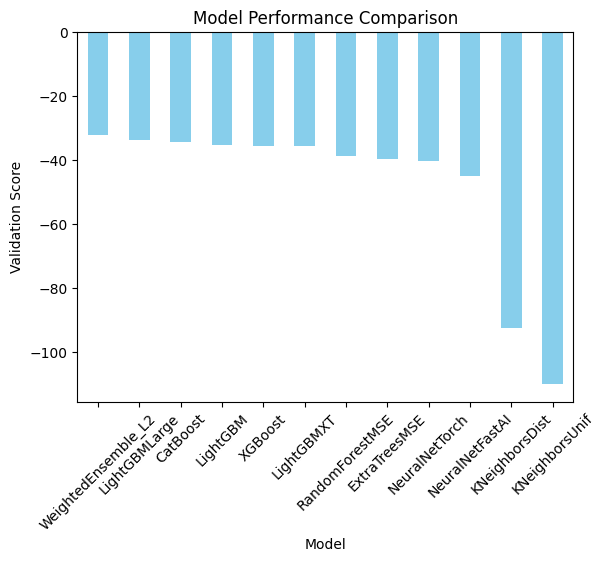

In [52]:
leaderboard.set_index('model', inplace=True)
leaderboard['score_val'].plot(kind='bar', color='skyblue') 
plt.title('Model Performance Comparison')
plt.ylabel('Validation Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

In [53]:
fit_summary = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -32.296030  root_mean_squared_error       0.557118  124.233990                0.000503           0.019315            2       True         12
1         LightGBMLarge  -33.808321  root_mean_squared_error       0.065139    3.842091                0.065139           3.842091            1       True         11
2              CatBoost  -34.339403  root_mean_squared_error       0.010263   54.768346                0.010263          54.768346            1       True          6
3              LightGBM  -35.322139  root_mean_squared_error       0.017190    1.471402                0.017190           1.471402            1       True          4
4               XGBoost  -35.571595  root_mean_squared_error       0.033706    1.888854                0.033

### Hyperparameter tuning 

Choosing the best models (towards the left of the graph) for tuning

In [54]:
hyperparameters = {
    'GBM': {'num_boost_round': 100}, 
    'CAT': {'iterations': 200, 'learning_rate': 0.05}
}

tuned_predictor = TabularPredictor(label='count').fit(train_data=df_train, hyperparameters=hyperparameters, time_limit=7200)

No path specified. Models will be saved in: "AutogluonModels/ag-20240511_040037"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ... Time limit = 7200s
AutoGluon will save models to "AutogluonModels/ag-20240511_040037"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Dec 19 13:14:11 UTC 202

In [55]:
tuned_predictor = TabularPredictor.load("AutogluonModels/ag-20240511_035214")

In [56]:
tuned_leaderboard = tuned_predictor.leaderboard(silent=True)

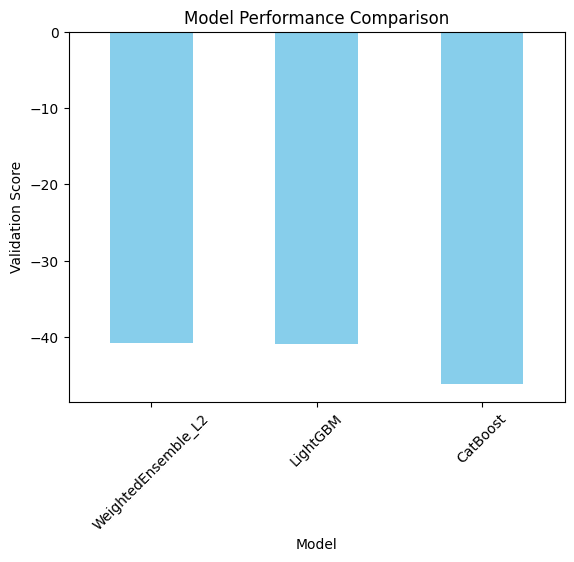

In [57]:
tuned_leaderboard.set_index('model', inplace=True)
tuned_leaderboard['score_val'].plot(kind='bar', color='skyblue') 
plt.title('Model Performance Comparison')
plt.ylabel('Validation Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

In [58]:
fit_summary = tuned_predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -40.771508  root_mean_squared_error       0.008392  0.936584                0.000470           0.007347            2       True          3
1             LightGBM -40.912075  root_mean_squared_error       0.005460  0.446940                0.005460           0.446940            1       True          1
2             CatBoost -46.150431  root_mean_squared_error       0.002462  0.482297                0.002462           0.482297            1       True          2
Number of models trained: 3
Types of models trained:
{'LGBModel', 'CatBoostModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('float', [])                : 3 | ['temp', 'atemp', 'windsp

### Running models on the test dataset

In [59]:
models = tuned_predictor.get_model_names()

predictions = {}
for model in models:
    predictions[model] = predictor.predict(df_test, model=model)

/tmp/ipykernel_33/3613539443.py:1: DeprecationWarning: `get_model_names` has been deprecated and will be removed in version 1.2. Please use `model_names` instead. This will raise an error in the future!
  models = tuned_predictor.get_model_names()


In [76]:
submission_ser = df_test['datetime']
pd.DataFrame(submission)

,datetime
0,2011-01-20 00:00:00
1,2011-01-20 01:00:00
2,2011-01-20 02:00:00
3,2011-01-20 03:00:00
4,2011-01-20 04:00:00
...,...
6488,2012-12-31 19:00:00
6489,2012-12-31 20:00:00
6490,2012-12-31 21:00:00
6491,2012-12-31 22:00:00


In [78]:
submission = submission_ser.to_frame(name='datetime')

In [80]:
submission.head()
type(submission)

pandas.core.frame.DataFrame

In [82]:
## Some of the counts were negative, so took abs values
for model in models: 
    submission.loc[:, 'count'] = predictions[model]
    submission.loc[:, 'count'] = submission['count'].abs()
    submission.to_csv(f'/kaggle/working/submission_{model}.csv', index=False)   

Kaggle score for LightGBM: 0.50304 <br>
Kaggle score for CatBoost: 0.56708 <br>
Kaggle score for Weighted Ensemble L2: 0.50920 <br>

<b> This means that LightGBM was the preferred model as per Autogluon

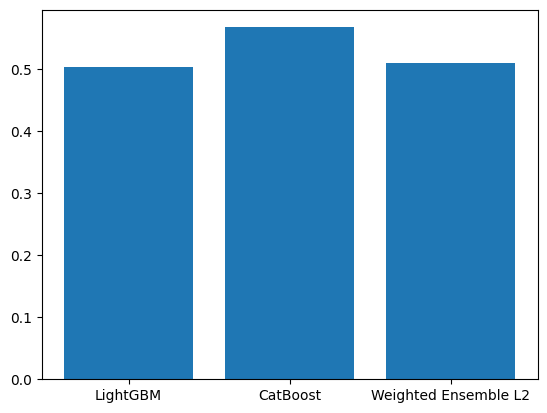

In [84]:
scores = {'LightGBM':0.50304, 'CatBoost': 0.56708, 'Weighted Ensemble L2':0.50920}

plt.bar(range(len(scores)), list(scores.values()), align='center')
plt.xticks(range(len(scores)), list(scores.keys()))
plt.show()

## Trying Random Forest Regressor

In [87]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4


In [93]:
df_train['day'] = df_train['datetime'].dt.day
df_train['month'] = df_train['datetime'].dt.month
df_train['year'] = df_train['datetime'].dt.year

df_train.drop(['datetime'], axis=1, inplace=True)
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1,2011


In [95]:
df_test['day'] = df_test['datetime'].dt.day
df_test['month'] = df_test['datetime'].dt.month
df_test['year'] = df_test['datetime'].dt.year

df_test.drop(['datetime'], axis=1, inplace=True)
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,1,0,1,1,10.66,11.365,56,26.0027,0,20,1,2011
1,1,0,1,1,10.66,13.635,56,0.0000,1,20,1,2011
2,1,0,1,1,10.66,13.635,56,0.0000,2,20,1,2011
3,1,0,1,1,10.66,12.880,56,11.0014,3,20,1,2011
4,1,0,1,1,10.66,12.880,56,11.0014,4,20,1,2011


<Axes: xlabel='hour', ylabel='count'>

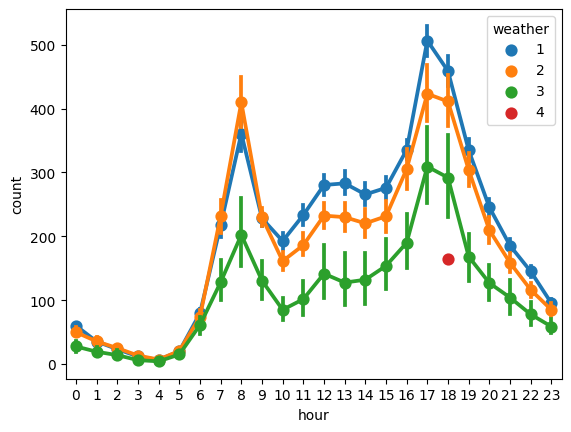

In [96]:
import seaborn as sns 

sns.pointplot(data=df_train, x="hour", y="count", hue="weather")

<Axes: >

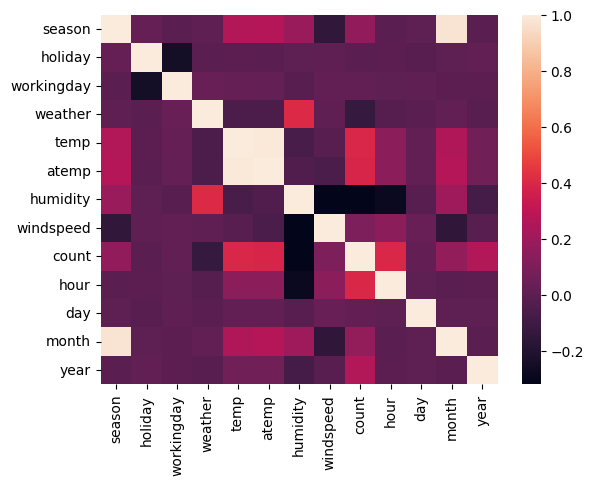

In [97]:
corr = df_train.corr()
sns.heatmap(corr)

Removing outlier weathers since RF is sensitive to outliers

In [98]:
df_train = df_train[df_train['weather']!=4]

In [99]:
from sklearn.model_selection import train_test_split

X = df_train.drop(['count'], axis=1)
y = df_train['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [101]:
y_pred = rf.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'The RMSE of the model is: {rmse}')

The RMSE of the model is: 45.357488499437146


#### Hyperparameter tuning for RF Regressor

In [105]:
from sklearn.model_selection import GridSearchCV, KFold

param_grid = {
    'n_estimators': [100, 200, 300],   
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}


kf = KFold(n_splits=5, shuffle=True, random_state=0)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2

In [108]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'The best model achieves an RMSE of: {rmse}')

The best model achieves an RMSE of: 45.16764080211645
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   4.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   7.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   9.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   7.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   7.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.0s
[CV] END max_depth=20, min_samples_

In [109]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [110]:
rf_best = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=20, min_samples_split=2, random_state=0)
rf_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_jobs=-1, random_state=0)

In [111]:
y_pred = rf_best.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'The RMSE of the model is: {rmse}')

The RMSE of the model is: 44.7764548444451


In [112]:
counts = rf_best.predict(df_test)

In [113]:
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,1,0,1,1,10.66,11.365,56,26.0027,0,20,1,2011
1,1,0,1,1,10.66,13.635,56,0.0000,1,20,1,2011
2,1,0,1,1,10.66,13.635,56,0.0000,2,20,1,2011
3,1,0,1,1,10.66,12.880,56,11.0014,3,20,1,2011
4,1,0,1,1,10.66,12.880,56,11.0014,4,20,1,2011


In [114]:
df_test['count'] = counts

In [115]:
df_test['datetime'] = pd.to_datetime(df_test[['year', 'month', 'day', 'hour']])

In [116]:
submission = df_test[['datetime', 'count']]

In [117]:
submission.to_csv('/kaggle/working/submission_RF.csv', index=False)

Kaggle score for RF Regressor is 0.48943

<b> Therefore the best model for this dataset is Random Forest Regressor